In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a DataFrame
df = pd.read_csv('pendulum_data.csv')
df.head()

,theta,theta_dot,theta_double_dot
0,0.040431,-0.069829,0.029322
1,-0.151797,-0.662335,0.138360
2,-0.584669,0.797156,0.446742
3,-0.151016,-0.772319,0.016372
4,0.256469,0.188715,-0.298235


In [2]:
# check missing values in the dataset
df.isnull().sum()

theta               0
theta_dot           0
theta_double_dot    0
dtype: int64

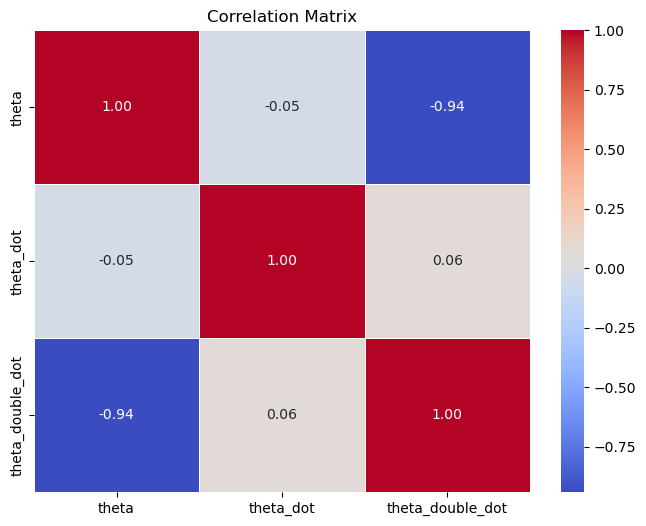

In [3]:
# Calculate the correlation matrix
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

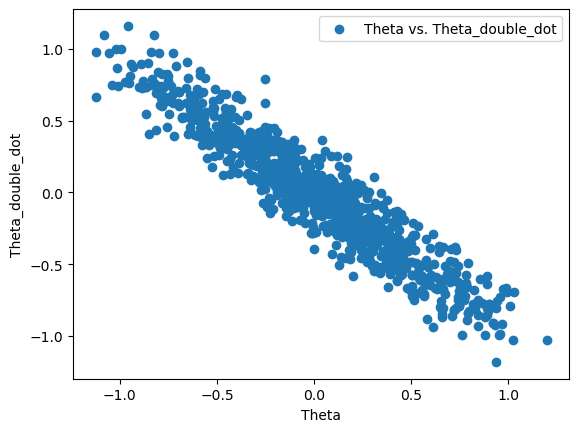

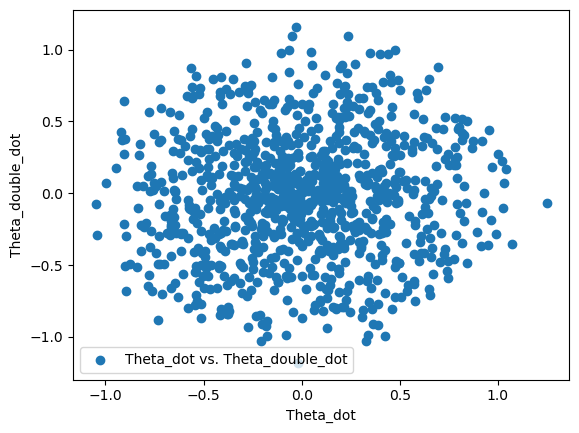

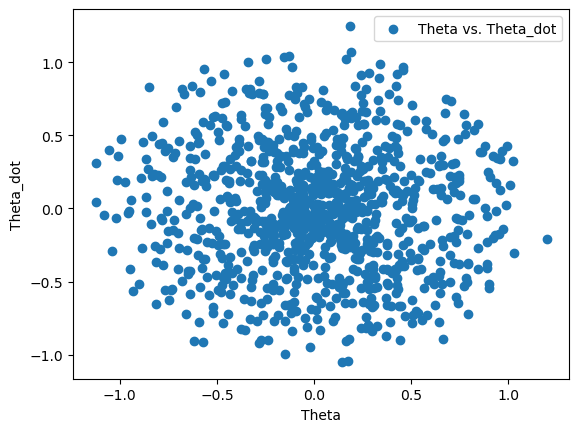

In [4]:
# Create scatter plots
plt.scatter(df['theta'], df['theta_double_dot'], label='Theta vs. Theta_double_dot')
plt.xlabel('Theta')
plt.ylabel('Theta_double_dot')
plt.legend()
plt.show()

plt.scatter(df['theta_dot'], df['theta_double_dot'], label='Theta_dot vs. Theta_double_dot')
plt.xlabel('Theta_dot')
plt.ylabel('Theta_double_dot')
plt.legend()
plt.show()

plt.scatter(df['theta'], df['theta_dot'], label='Theta vs. Theta_dot')
plt.xlabel('Theta')
plt.ylabel('Theta_dot')
plt.legend()
plt.show()

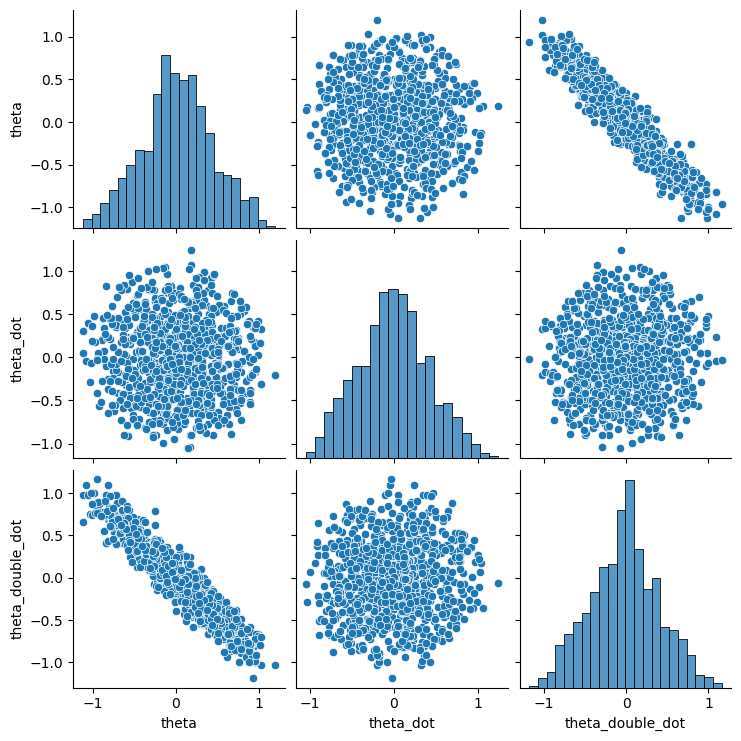

In [5]:
sns.pairplot(df)

# 1st Hypothesis

theta_double_dot=w0 + w1*theta + w2*theta_dot

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Split the data into training and testing sets
X = df[['theta', 'theta_dot']]
y = df['theta_double_dot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# cross validation to finalize hypothesis
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = [(-score)**0.5 for score in ridge_scores]

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = sum(ridge_rmse_scores) / num_folds
std_rmse = (sum([(rmse - mean_rmse)**2 for rmse in ridge_rmse_scores]) / num_folds)**0.5

print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation RMSE: {std_rmse}")


Mean Squared Error: 0.0201
Mean RMSE: 0.1410130075304068
Standard Deviation RMSE: 0.007961364892928088


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import warnings

def cross_validation(fold,model):
    
    # Initialize k-fold cross-validation
    num_folds = fold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_accuracies = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]  # Use .iloc to access DataFrame by index
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]  # Use .iloc to access DataFrame by index

        # Train ridge regression model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_pred = ridge_model.predict(X_val)

        # Calculate accuracy for this fold (R-squared score)
        fold_accuracy = r2_score(y_val, y_pred)
        fold_accuracies.append(fold_accuracy)

    # Calculate and return average accuracy across all folds
    avg_accuracy = sum(fold_accuracies) / num_folds
    return avg_accuracy

acc1=cross_validation(5,ridge_model)*100
print(f'Accuracy:{acc1:.2f}%')

Accuracy:88.42%


In [8]:
ridge_model.coef_

array([-0.90340834,  0.02117326])

In [9]:
ridge_model.intercept_

-0.007227299584245313

# 2nd Hypothesis

theta_double_dot=w0 + w1*Sin(theta) + w2*theta_dot

In [10]:
import math
df['Sintheta']=df['theta'].apply(lambda x:math.sin(x))
df['Costheta_dot']=df['theta_dot'].apply(lambda x:math.cos(x))
df.head()

,theta,theta_dot,theta_double_dot,Sintheta,Costheta_dot
0,0.040431,-0.069829,0.029322,0.040420,0.997563
1,-0.151797,-0.662335,0.138360,-0.151214,0.788558
2,-0.584669,0.797156,0.446742,-0.551923,0.698744
3,-0.151016,-0.772319,0.016372,-0.150442,0.716294
4,0.256469,0.188715,-0.298235,0.253667,0.982246


In [11]:
# Split the data into training and testing sets
X = df[['Sintheta', 'Costheta_dot']]
y = df['theta_double_dot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# cross validation to finalize hypothesis
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = [(-score)**0.5 for score in ridge_scores]

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = sum(ridge_rmse_scores) / num_folds
std_rmse = (sum([(rmse - mean_rmse)**2 for rmse in ridge_rmse_scores]) / num_folds)**0.5

print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation RMSE: {std_rmse}")

acc2=cross_validation(5,ridge_model)*100
print(f'Accuracy:{acc2:.2f}%')

Mean Squared Error: 0.0206
Mean RMSE: 0.14163835449141896
Standard Deviation RMSE: 0.008191598578730036
Accuracy:88.31%


# 3rd Hypothesis

theta_double_dot=w0 + w1*theta + w2Sin^2(theta) + w3(theta_dot)^2

In [12]:
df['Sin2theta']=df['Sintheta'].apply(lambda x:x*x)
df['theta_dot2']=df['theta_dot'].apply(lambda x:x*x)
df.head()

,theta,theta_dot,theta_double_dot,Sintheta,Costheta_dot,Sin2theta,theta_dot2
0,0.040431,-0.069829,0.029322,0.040420,0.997563,0.001634,0.004876
1,-0.151797,-0.662335,0.138360,-0.151214,0.788558,0.022866,0.438688
2,-0.584669,0.797156,0.446742,-0.551923,0.698744,0.304619,0.635458
3,-0.151016,-0.772319,0.016372,-0.150442,0.716294,0.022633,0.596477
4,0.256469,0.188715,-0.298235,0.253667,0.982246,0.064347,0.035613


In [13]:
# Split the data into training and testing sets
X = df[['theta', 'Sin2theta','theta_dot2']]
y = df['theta_double_dot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# cross validation to finalize hypothesis
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = [(-score)**0.5 for score in ridge_scores]

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = sum(ridge_rmse_scores) / num_folds
std_rmse = (sum([(rmse - mean_rmse)**2 for rmse in ridge_rmse_scores]) / num_folds)**0.5

print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation RMSE: {std_rmse}")

acc3=cross_validation(5,ridge_model)*100
print(f'Accuracy:{acc3:.2f}%')

Mean Squared Error: 0.0199
Mean RMSE: 0.14131694968824043
Standard Deviation RMSE: 0.00820886048480863
Accuracy:88.36%


## 4th Hypothesis

theta_double_dot=w1*theta

In [14]:
# Split the data into training and testing sets
X = df[['theta']]
y = df['theta_double_dot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Ridge regression model
ridge_model = Ridge(alpha=1.0,fit_intercept=False)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# cross validation to finalize hypothesis
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = [(-score)**0.5 for score in ridge_scores]

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = sum(ridge_rmse_scores) / num_folds
std_rmse = (sum([(rmse - mean_rmse)**2 for rmse in ridge_rmse_scores]) / num_folds)**0.5

print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation RMSE: {std_rmse}")

acc4=cross_validation(5,ridge_model)*100
print(f'Accuracy:{acc4:.2f}%')

Mean Squared Error: 0.0197
Mean RMSE: 0.14096883115012324
Standard Deviation RMSE: 0.008096136324203976
Accuracy:88.43%
